# 1.Preparation

### Abalone Data Set（abalone.data） from UCI Machine Learning Repository
http://archive.ics.uci.edu/ml/datasets/Abalone 

### In advance, manually modify the .data file to a .csvfile.


In [223]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import normaltest
import seaborn as sns
%matplotlib inline

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x:'%.4f'%x) #store 4 digits after the decimal

# 2.Descriptive Analysis 
According to the analysis results of last semester's report
### The "Rings" variable is the number of abalone rings, which can represent the age of abalone and is a predictor variable. All are continuous variables except for "sex" which is a discrete feature.

### From the following analysis, we can learn that 
### ・There is no missing data.
### ・There are 4177 rows of data.
### ・There are no extreme values.
### ・The data are not normalized. 
### ・The scales are different for different variables.

In [224]:
abalone = pd.read_csv('/Users/sami/Downloads/abalone.csv',
                     names=['Sex', 'Length','Diameter','Height','Whole_wt','Shucked_wt','Viscera_wt','Shell_wt','Rings']) 
abalone.head()                             


,Sex,Length,Diameter,Height,Whole_wt,Shucked_wt,Viscera_wt,Shell_wt,Rings
0,M,0.4550,0.3650,0.0950,0.5140,0.2245,0.1010,0.1500,15
1,M,0.3500,0.2650,0.0900,0.2255,0.0995,0.0485,0.0700,7
2,F,0.5300,0.4200,0.1350,0.6770,0.2565,0.1415,0.2100,9
3,M,0.4400,0.3650,0.1250,0.5160,0.2155,0.1140,0.1550,10
4,I,0.3300,0.2550,0.0800,0.2050,0.0895,0.0395,0.0550,7


In [225]:
abalone.isnull().any()

Sex           False
Length        False
Diameter      False
Height        False
Whole_wt      False
Shucked_wt    False
Viscera_wt    False
Shell_wt      False
Rings         False
dtype: bool

In [226]:
abalone.describe()

,Length,Diameter,Height,Whole_wt,Shucked_wt,Viscera_wt,Shell_wt,Rings
count,4177.0000,4177.0000,4177.0000,4177.0000,4177.0000,4177.0000,4177.0000,4177.0000
mean,0.5240,0.4079,0.1395,0.8287,0.3594,0.1806,0.2388,9.9337
std,0.1201,0.0992,0.0418,0.4904,0.2220,0.1096,0.1392,3.2242
min,0.0750,0.0550,0.0000,0.0020,0.0010,0.0005,0.0015,1.0000
25%,0.4500,0.3500,0.1150,0.4415,0.1860,0.0935,0.1300,8.0000
50%,0.5450,0.4250,0.1400,0.7995,0.3360,0.1710,0.2340,9.0000
75%,0.6150,0.4800,0.1650,1.1530,0.5020,0.2530,0.3290,11.0000
max,0.8150,0.6500,1.1300,2.8255,1.4880,0.7600,1.0050,29.0000


In [227]:
abalone['Sex'].value_counts()  

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole_wt'}>],
       [<AxesSubplot:title={'center':'Shucked_wt'}>,
        <AxesSubplot:title={'center':'Viscera_wt'}>,
        <AxesSubplot:title={'center':'Shell_wt'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

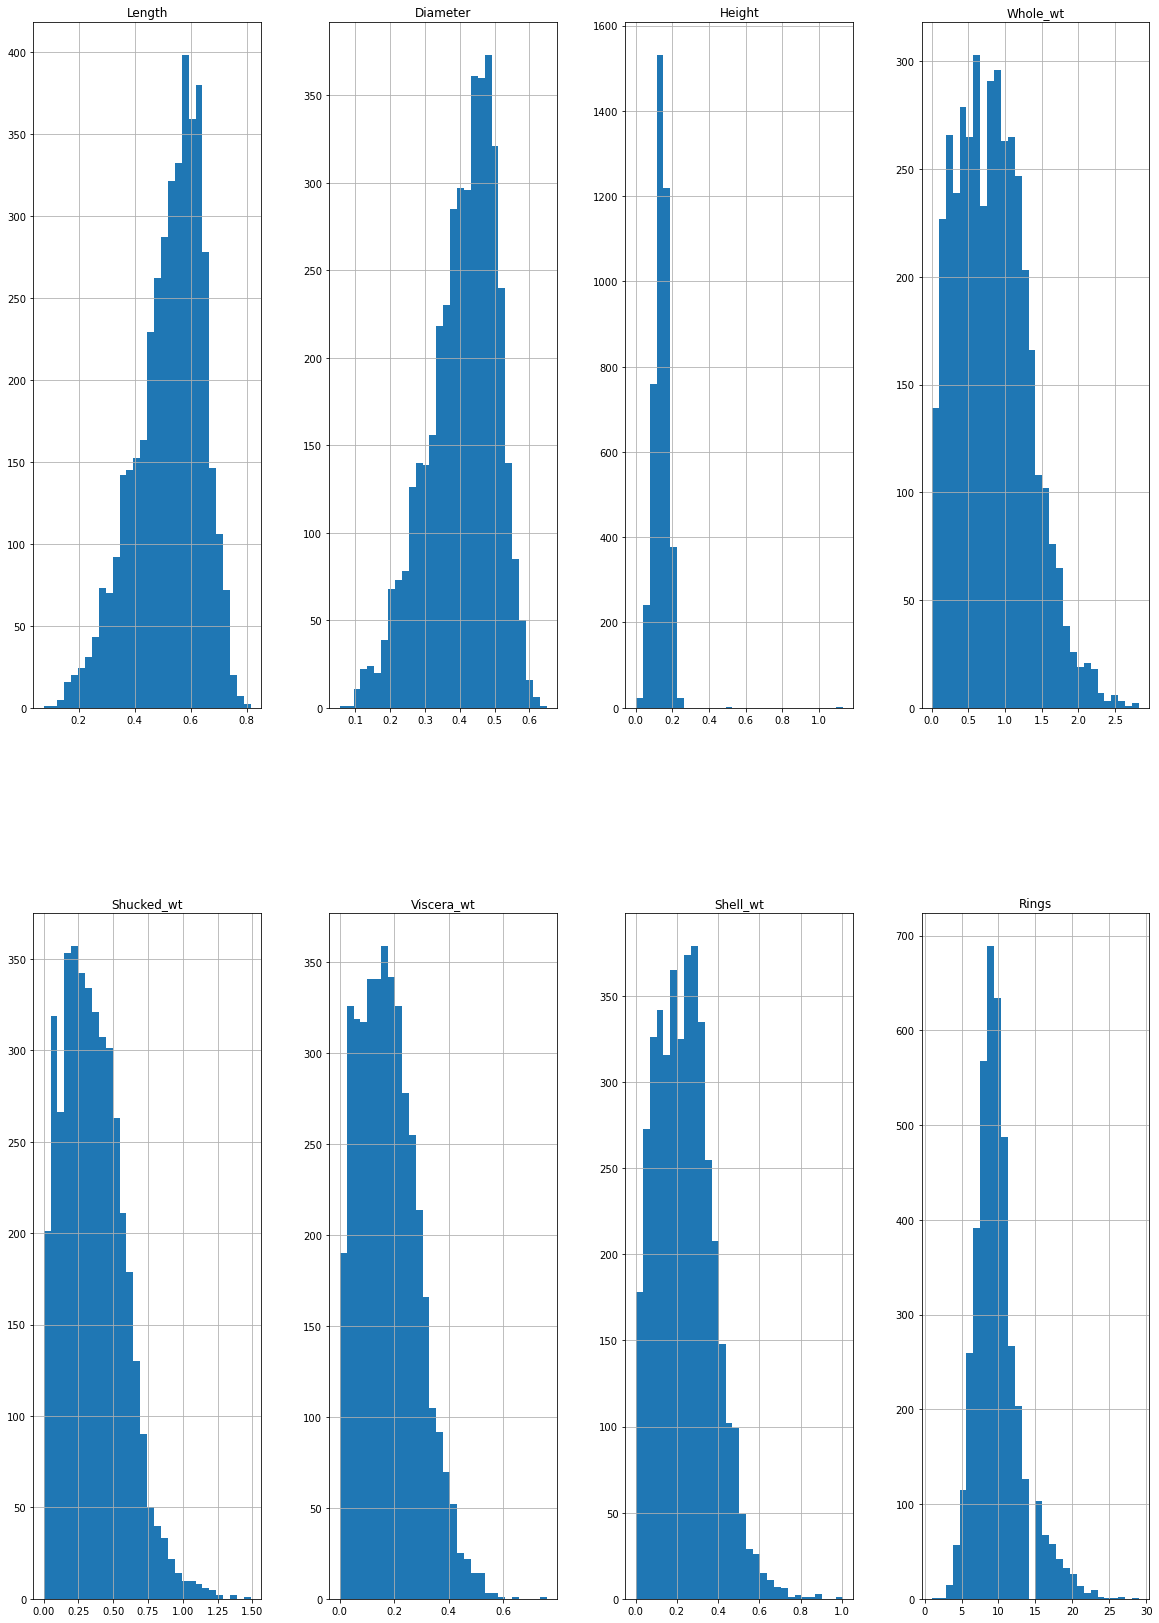

In [228]:
abalone.hist(figsize=(20, 29), grid=True, layout=(2, 4), bins=30)


# 3.Correlation Analysis

### From the scatter plot of continuous variables and the table of correlation coefficients, we can see some basic results.

###  ・From the first row of the scatter plot , we can see that there is a clear linear relationship between the "Length" and  "Diameter" or "Height". There is a clear non-linear relationship between “Length” and the four "weight variables" of abalone.

###  ・Looking at the last row, there is a positive correlation between the number of abalone rings and each characteristic, with the linear relationship with height being the most intuitive.

###  ・Looking at the histogram on the diagonal line, we can see that juvenile abalone (sex ="I") take significantly smaller values than other adult abalone for each characteristic.There was no significant difference in the distribution of the values of each characteristic between male (sex ="M") and female (sex ="F") abalone.

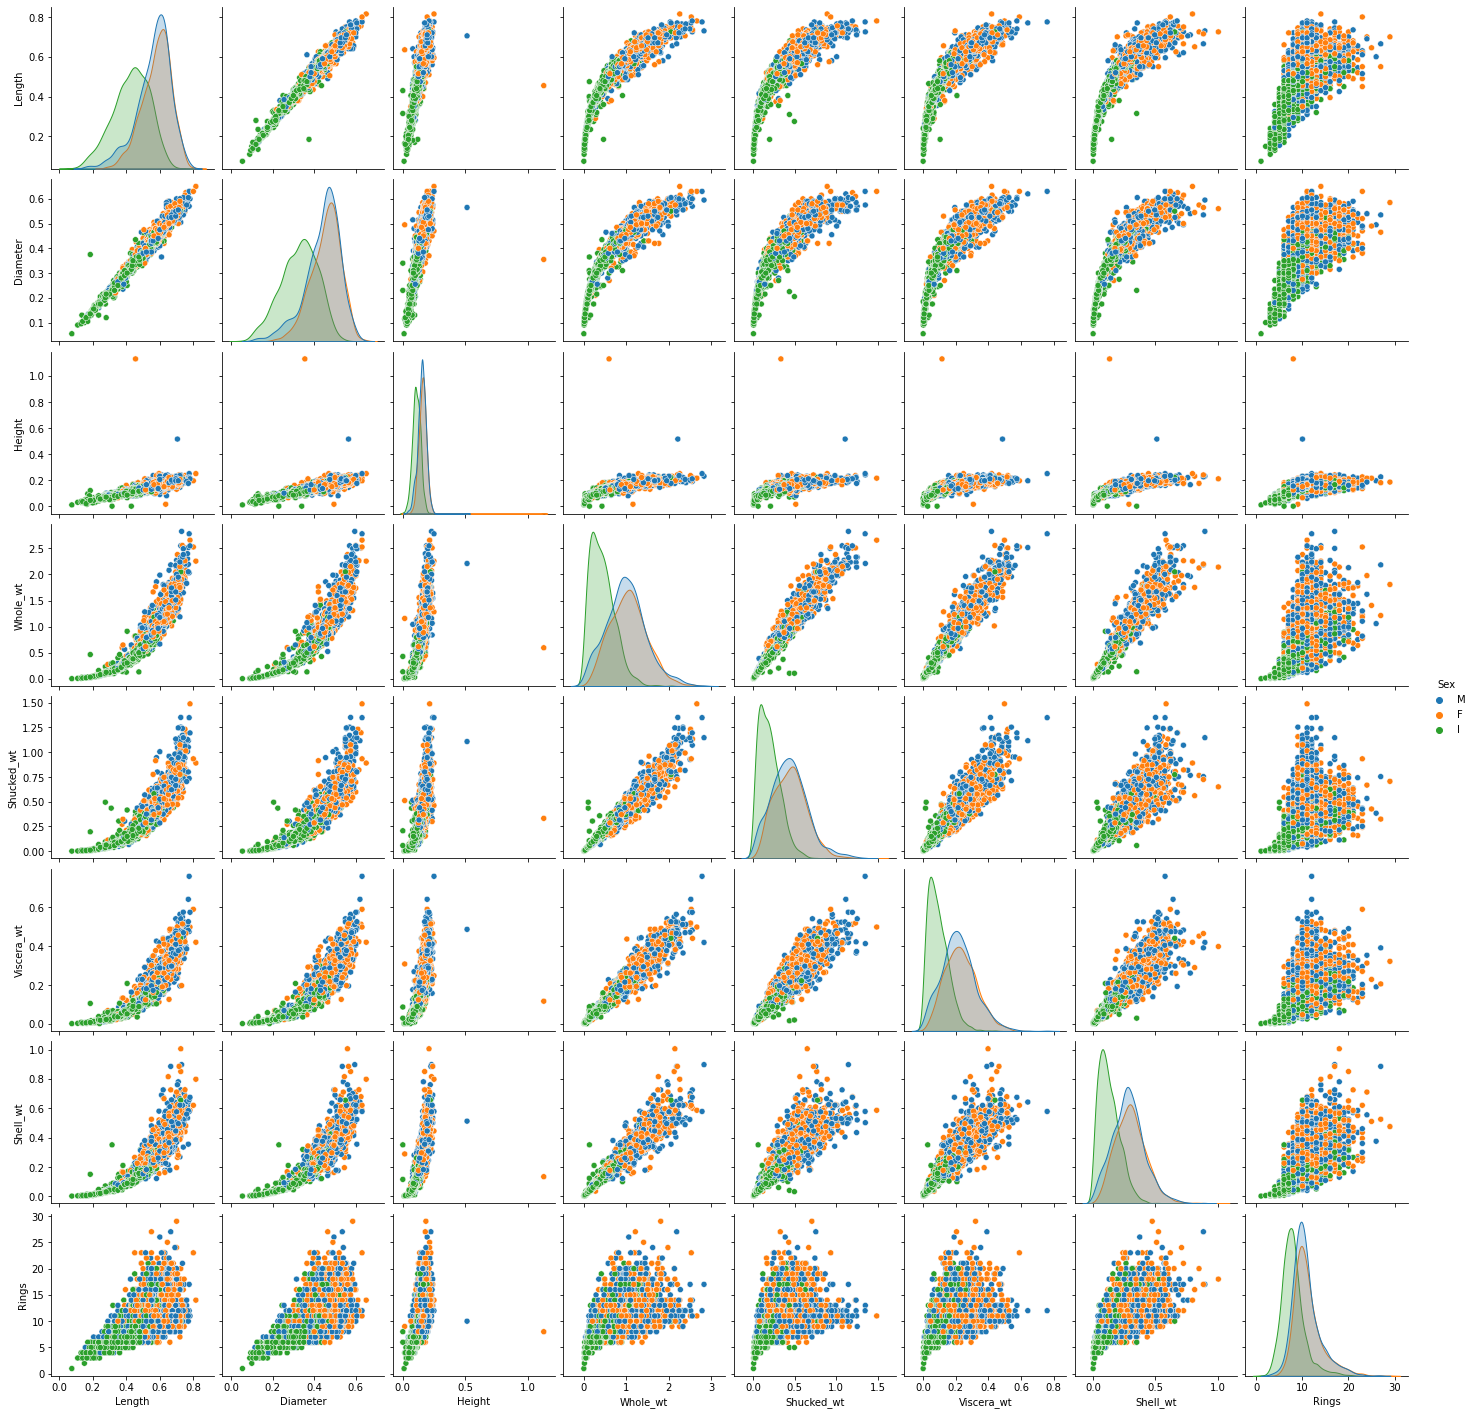

In [229]:
sns.pairplot(abalone, hue='Sex')

In [230]:
abalone.corr()

,Length,Diameter,Height,Whole_wt,Shucked_wt,Viscera_wt,Shell_wt,Rings
Length,1.0000,0.9868,0.8276,0.9253,0.8979,0.9030,0.8977,0.5567
Diameter,0.9868,1.0000,0.8337,0.9255,0.8932,0.8997,0.9053,0.5747
Height,0.8276,0.8337,1.0000,0.8192,0.7750,0.7983,0.8173,0.5575
Whole_wt,0.9253,0.9255,0.8192,1.0000,0.9694,0.9664,0.9554,0.5404
Shucked_wt,0.8979,0.8932,0.7750,0.9694,1.0000,0.9320,0.8826,0.4209
Viscera_wt,0.9030,0.8997,0.7983,0.9664,0.9320,1.0000,0.9077,0.5038
Shell_wt,0.8977,0.9053,0.8173,0.9554,0.8826,0.9077,1.0000,0.6276
Rings,0.5567,0.5747,0.5575,0.5404,0.4209,0.5038,0.6276,1.0000


# 4.Normality test

###  I had known there are a few specific versions of scripy that have bugs in "kstest", and also given the large sample, I will use "normaltest".

###  The original hypothesis of the normaltest is that "the distribution from which the sample data are drawn is not significantly different from the normal distribution". p-values greater than 0.05 indicate that the distribution is normal.


###  ・By analysis, in fact, the subsamples of each variable for each category did not pass the normality test（ all p-values < 0.05 ）


In [231]:


sub_M=abalone[abalone['Sex']=='M']
sub_F=abalone[abalone['Sex']=='F']
sub_I=abalone[abalone['Sex']=='I']

print(stats.normaltest(abalone['Rings']).pvalue)

print(stats.normaltest(sub_M['Rings']).pvalue)
print(stats.normaltest(sub_F['Rings']).pvalue)
print(stats.normaltest(sub_I['Rings']).pvalue)




2.300144867340782e-177
3.756329859910726e-77
3.3879104792417984e-81
2.286321366636804e-77


In [232]:
print(stats.normaltest(sub_M['Viscera_wt']).pvalue)
print(stats.normaltest(sub_F['Viscera_wt']).pvalue)

5.936907050882223e-17
1.0747910100309911e-07


### Although the hypothesis that the data obey a normal distribution was not satisfied, a two-sample t-test was conducted here. 
### The original hypothesis was that the means of rings for each classification were equal. Means can be considered significantly different when p is greater than 0.05.

### ・Through the analysis, the original hypothesis was rejected and the means could not be considered significantly different （all p-values < 0.05 ）.

In [237]:

test_of_MF=stats.ttest_ind(sub_M['Rings'], sub_F['Rings'], equal_var=False)
print(test_of_MF.pvalue)
test_of_FI=stats.ttest_ind(sub_F['Rings'], sub_I['Rings'], equal_var=False)
print(test_of_FI.pvalue)
test_of_IM=stats.ttest_ind(sub_I['Rings'], sub_M['Rings'], equal_var=False)
print(test_of_IM.pvalue)


0.00025138132428459127
3.0807254628741295e-164
2.7655595370253657e-145
